## EDA

In [1310]:
#Importación de las librerías
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Recompilación y carga de datos

In [1311]:
#Extraigo los dat un poco arreglados
us_dt= pd.read_csv("datasets/rating_users.csv", sep=';')
platf_dt=pd.read_csv("datasets/platformdata.csv", sep=';')

In [1312]:
platf_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       14739 non-null  object 
 4   cast           17677 non-null  object 
 5   country        11499 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   listed_in      22998 non-null  object 
 10  description    22994 non-null  object 
 11  duration_int   22516 non-null  float64
 12  duration_type  22516 non-null  object 
 13  score          22998 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 2.5+ MB


In [1313]:
us_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11013823 entries, 0 to 11013822
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   rating     float64
 2   timestamp  object 
 3   movieId    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 336.1+ MB


In [1314]:
#Considerando que son calificaciones registros de score es normal los repetidos
us_dt[us_dt.duplicated()]

,userId,rating,timestamp,movieId


In [1315]:
us_dt[(us_dt.userId == 24) & (us_dt.movieId == 'hs963')]

,userId,rating,timestamp,movieId
2014,24,3.0,2001-01-20,hs963


In [1316]:
platf_dt[platf_dt.duplicated()]

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score


In [1317]:
us_dt.drop_duplicates(inplace=True)

In [1318]:
# Reviso los vacíos.
us_dt.isnull().sum()

userId       0
rating       0
timestamp    0
movieId      0
dtype: int64

In [1319]:
platf_dt.isnull().sum()

id                   0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
listed_in            0
description          4
duration_int       482
duration_type      482
score                0
dtype: int64

Ver el porcentaje de valores faltantes en 'director','cast','country','date_added','duration_int','duration_type'. No considero descripción por que el valor de vacíos es ínfimo en comparación sin considerar que para el modelo ya luego no seria util(la columna  como tal).

In [1320]:
print('Porcentaje de valores faltantes de la variable director:', (platf_dt['director'].isnull().sum()/len(platf_dt)) * 100)

Porcentaje de valores faltantes de la variable director: 35.91181841899296


In [1321]:
print('Porcentaje de valores faltantes de la variable cast:', (platf_dt['cast'].isnull().sum()/len(platf_dt)) * 100)

Porcentaje de valores faltantes de la variable cast: 23.1367945038699


In [1322]:
print('Porcentaje de valores faltantes de la variable country:', (platf_dt['country'].isnull().sum()/len(platf_dt)) * 100)

Porcentaje de valores faltantes de la variable country: 50.0


In [1323]:
#
print('Porcentaje de valores faltantes de la variable date_added:', (platf_dt['date_added'].isnull().sum()/len(platf_dt)) * 100) 

Porcentaje de valores faltantes de la variable date_added: 41.5427428472041


In [1324]:
#Este es igual al correspondiente a duration_type por que provienen de una misma columna.
print('Porcentaje de valores faltantes de la variable duration_int:', (platf_dt['duration_int'].isnull().sum()/len(platf_dt)) * 100)

Porcentaje de valores faltantes de la variable duration_int: 2.0958344203843815


Limpieza de datos

In [1325]:
#Después de ver un poco en detalle los faltantes, se estaría drapeando filas con datos faltantes en relación a  descripción y duration int (puesto que se desconoce que valores pudieran tomar y no son tan grandes los valores faltantes .

In [1326]:
platf_dt.isnull().sum()

id                   0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
listed_in            0
description          4
duration_int       482
duration_type      482
score                0
dtype: int64

In [1327]:
# Aqui reviso si la columna duration_type pudiera relacionarse con el tipo de pelicula (tv_show y movies). Para descartar si son seasons o min e imputarlos luego con la media. Pero no parecen estar relacionados.
df= platf_dt.drop(platf_dt[platf_dt['type']=='tv show'].index)
df.isnull().sum()

id                  0
type                0
title               0
director         1972
cast             2842
country          8614
date_added       7798
release_year        0
rating              0
listed_in           0
description         3
duration_int      482
duration_type     482
score               0
dtype: int64

In [1328]:
#Retiro como los vacios en relacion a estas dos columnas, que no son muchos
platf_dt.dropna(subset='duration_int', inplace=True)
platf_dt.dropna(subset='description', inplace=True)
 

In [1329]:
platf_dt.isnull().sum()

id                   0
type                 0
title                0
director          7779
cast              4841
country          11318
date_added        9554
release_year         0
rating               0
listed_in            0
description          0
duration_int         0
duration_type        0
score                0
dtype: int64

2. Revisar valores atípicos para su tratamiento según.

In [1330]:
platf_dt.type.value_counts()

movie      15999
tv show     6516
Name: type, dtype: int64

In [1331]:
platf_dt.type.value_counts(normalize=True)

movie      0.710593
tv show    0.289407
Name: type, dtype: float64

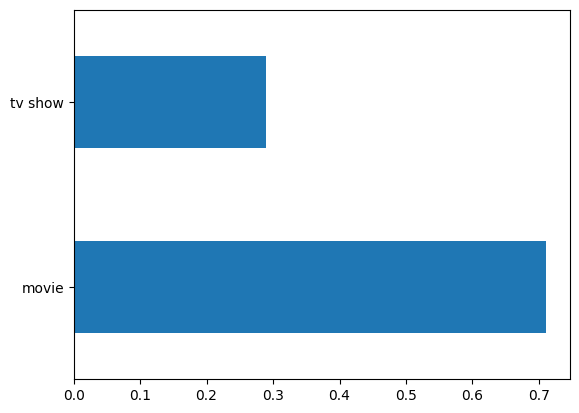

In [1332]:
platf_dt.type.value_counts(normalize=True).plot.barh()
plt.show()

In [1333]:
platf_dt.duration_int.describe()

count    22515.000000
mean        67.120187
std         51.400883
min          0.000000
25%          3.000000
50%         85.000000
75%        102.000000
max        601.000000
Name: duration_int, dtype: float64

C:\Users\gianp\AppData\Local\Temp\ipykernel_25232\293223238.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(platf_dt['duration_int'])


<Axes: xlabel='duration_int', ylabel='Density'>

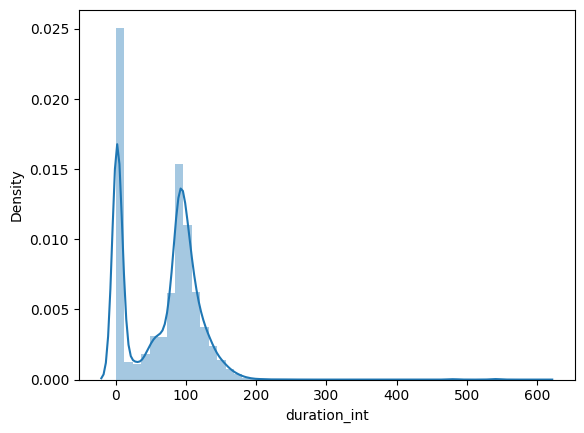

In [1334]:
sns.distplot(platf_dt['duration_int'])

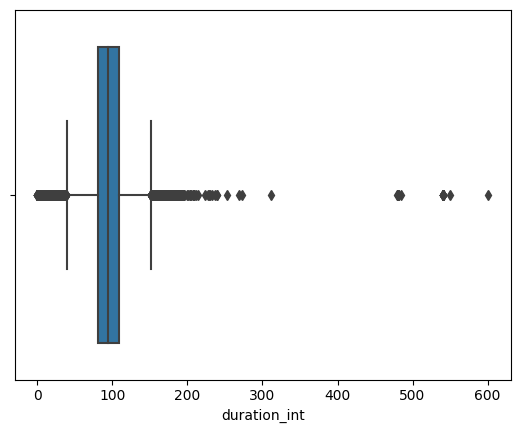

In [1335]:
#En antes considere aun duration_type  with min. Asi que aquí dividí solo los que tienen min.
data= platf_dt[platf_dt['duration_type'] == 'min']
sns.boxplot(x = 'duration_int', data = data)
plt.show()

In [1336]:
#Considerando que este máximo se encuentra en minutos y la película mas larga del mundo aun dura 21 es hasta cierto punto creíble.
data.duration_int.max()

601.0

In [1337]:
# Sin embargo que una película no tenga ninguna hora de duración es incoherente.
data.duration_int.min()

0.0

In [1338]:
# Se realiza la técnica del rango intecuartilico para eliminar los outliers.
Q1 = data['duration_int'].quantile(0.25)
Q3 = data['duration_int'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

81.0
109.0
28.0
39.0
151.0


In [1339]:
print(platf_dt.shape[0])# Se revisa un momento el tamaño del data frame principal.
print('Cantidad de registros totales:', data.shape[0]) # 
print('Cantidad de outliers:', data[(data['duration_int']<BI) | (data['duration_int']>BS)].shape[0] )

22515
Cantidad de registros totales: 15999
Cantidad de outliers: 1473


In [1340]:
# Se eliminan aquellos datos fuera de el bigote, por encima y por debajo y lo almaceno en el dataframe de transición.
out_duration_int=(data['duration_int']<BI) | (data['duration_int']>BS)
data = data[~out_duration_int]
print(data.shape[0])

14526


In [1341]:
# Dropeo los datos totales con duration_type = 'min' para agregar luego los del data auxiliar
platf_dt.drop(platf_dt[platf_dt['duration_type'] == 'min'].index , inplace=True)
platf_dt = pd.concat([platf_dt,data],axis=0)
print(platf_dt.shape[0])

21042


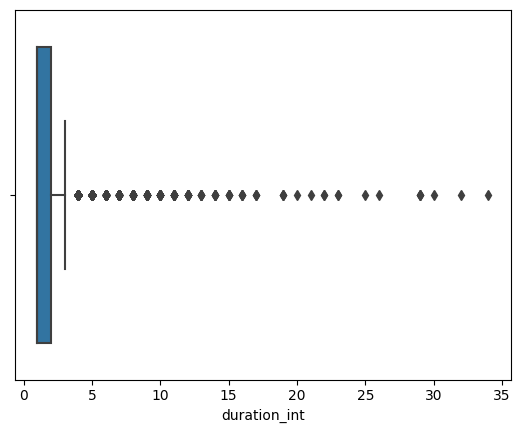

In [1342]:
data= platf_dt[platf_dt['duration_type'] == 'seasons']
sns.boxplot(x = 'duration_int', data = data)
plt.show()

In [1343]:

print(data.duration_int.max())
print(data.duration_int.min())

34.0
1.0


In [1344]:
# Se realiza la técnica del rango intecuartilico para eliminar los outliers.
Q1 = data['duration_int'].quantile(0.25)
Q3 = data['duration_int'].quantile(0.75)
IQR = Q3 - Q1
BI = Q1 - 1.5*IQR
BS = Q3 + 1.5*IQR

print(Q1)
print(Q3)
print(IQR)
print(BI)
print(BS)

1.0
2.0
1.0
-0.5
3.5


In [1345]:
print(platf_dt.shape[0])# Se revisa un momento el tamaño del data frame principal.
print('Cantidad de registros totales:', data.shape[0])  
print('Cantidad de outliers:', data[(data['duration_int']<BI) | (data['duration_int']>BS)].shape[0] )

21042
Cantidad de registros totales: 6516
Cantidad de outliers: 858


In [1346]:
# Se eliminan aquellos datos fuera de el bigote, por encima y por debajo y lo almaceno en el dataframe de transición.
out_duration_int=(data['duration_int']<BI) | (data['duration_int']>BS)
data = data[~out_duration_int]
print(data.shape[0])

5658


In [1347]:
# Dropeo los datos totales con duration_type = 'min' para agregar luego los del data auxiliar
platf_dt.drop(platf_dt[platf_dt['duration_type'] == 'seasons'].index , inplace=True)
platf_dt = pd.concat([platf_dt,data],axis=0)
print(platf_dt.shape[0])

20184


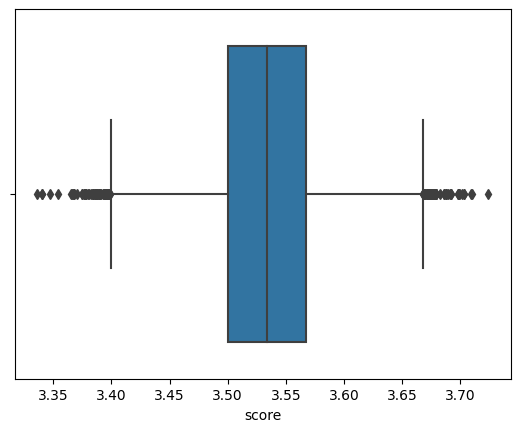

In [1348]:
#score se encuentra simétrico entonces no le pasare por cuartiles.
sns.boxplot(x = 'score', data = platf_dt)
plt.show()

In [1349]:
#Revisando igual, esta dentro de margenes aceptables considerando que no varia mucho entre los resultados.
platf_dt.score.max()

3.723913043478261

In [1350]:
platf_dt.score.min()

3.336477987421384

In [1351]:
# Reviso en todo caso  el valor de los años
platf_dt.release_year.value_counts()

2021    2125
2020    2090
2019    2081
2018    1916
2017    1696
        ... 
1926       2
1922       2
1923       2
1924       1
1927       1
Name: release_year, Length: 100, dtype: int64

In [1352]:
# Ver como datos normalizados
platf_dt.release_year.value_counts(normalize=True)

2021    0.105281
2020    0.103547
2019    0.103101
2018    0.094927
2017    0.084027
          ...   
1926    0.000099
1922    0.000099
1923    0.000099
1924    0.000050
1927    0.000050
Name: release_year, Length: 100, dtype: float64

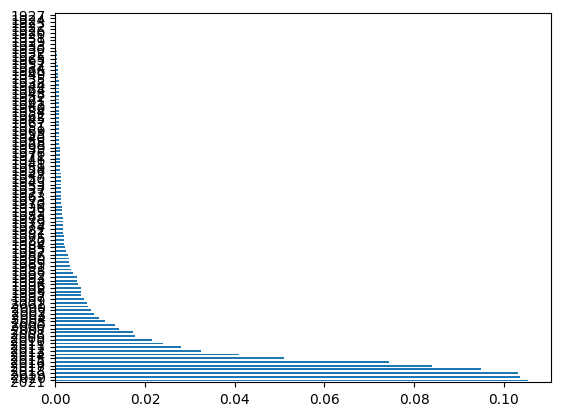

In [1353]:
# Igualmente se gráfica y se puede observar cierta tendencia a mayor cantidad de películas en fechas póstumas.
platf_dt.release_year.value_counts(normalize=True).plot.barh()
plt.show()

In [1354]:
# Intento utilizar siempre en adelante solo las peliculas
data= platf_dt[platf_dt['type'] == 'movie']

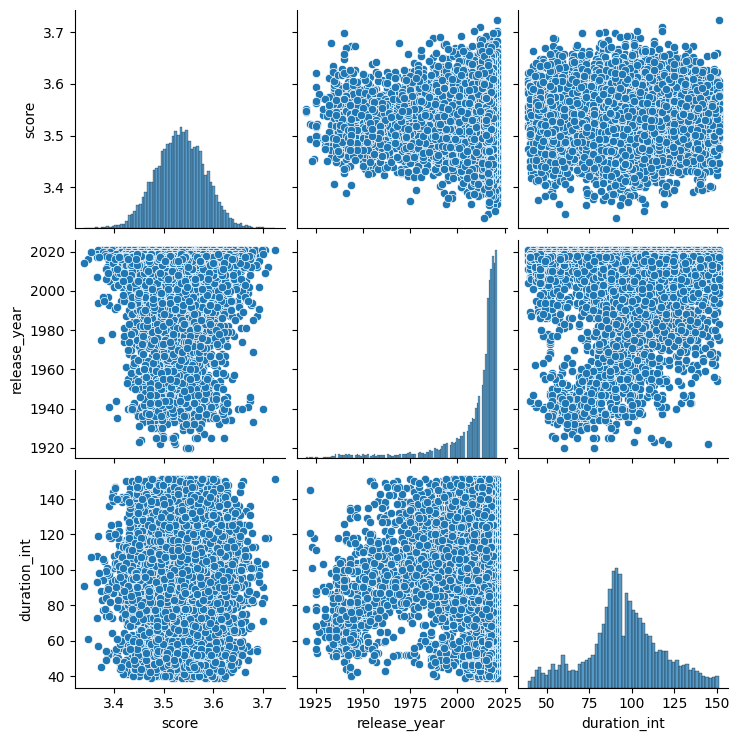

In [1356]:
# Ahora mismo no parecen guardar relacion alguna..
sns.pairplot(data = data, vars=['score','release_year','duration_int'])
plt.show()

In [1357]:
data = platf_dt[platf_dt['type']=='movie']
data[['score','release_year','duration_int']].corr()

,score,release_year,duration_int
score,1.000000,0.010548,-0.015324
release_year,0.010548,1.000000,0.039854
duration_int,-0.015324,0.039854,1.000000


In [1359]:
platf_dt.head(5)

,id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_int,duration_type,score
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,113.0,min,3.467131
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,"drama, international",a metro family decides to fight a cyber crimin...,110.0,min,3.548682
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,g,"action, drama, suspense",after a man discovers his wife is cheating on ...,74.0,min,3.498812
3,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,g,documentary,"pink breaks the mold once again, bringing her ...",69.0,min,3.536093
4,as5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,g,"drama, fantasy",teenage matt banting wants to work with a famo...,45.0,min,3.478992


In [1360]:
us_dt.head(2)

,userId,rating,timestamp,movieId
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186


In [1361]:
# Aqui decido guardar los datos en moviescore para que los lea la api. No antes de realizar algunos cambios para que en las querys no surjan inconvenientes.
moviescores = platf_dt
moviescores['director'].fillna("Sin registro", inplace=True)
moviescores['cast'].fillna("Sin registro", inplace=True)
moviescores['country'].fillna("Sin registro", inplace=True)
moviescores['description'].fillna("Sin registro", inplace=True)

moviescores.to_csv('datasets/moviescores.csv',index=False,sep=';')

In [1358]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(platf_dt[['release_year']]) 
platf_dt['Pesos'] = scaler.transform(data_ejercicio[['Pesos']]) 